# setup

In [1]:
import vtk

# show function

In [2]:
def vtk_show(renderer, w=250, h=250):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(w, h)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = bytes(memoryview(writer.GetResult()))
    
    from IPython.display import Image
    return Image(data)

# create cylinder

In [3]:
cylinder = vtk.vtkCylinderSource()
cylinder.SetRadius(2.5)
cylinder.SetHeight(5.0)
cylinder.SetResolution(20)

# mapper

In [4]:
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(cylinder.GetOutputPort())

# actor

In [5]:
actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.RotateX(30.0)
actor.RotateY(-45.0)

# create renderer and assign actor to the renderer

In [6]:
ren = vtk.vtkRenderer()
ren.AddActor(actor)
ren.SetBackground(0.2, 0.2, 0.5)

# show

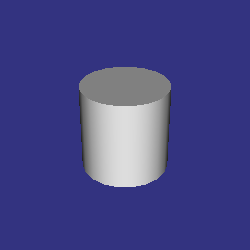

In [7]:
vtk_show(ren)